<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%206/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Analyzing Where Do People Drink?

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

*   Be confident about your data analysis skills


This dataset is from the story: \<a href=[https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01>](https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01%3E)  Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits? </a>  The dataset contains average serving sizes per person such as average wine, spirit, beer servings, as well as several other metrics. You will be asked to analyze the data and predict the total liters served given the servings. At the end of the lab, you will be instructed on how you can share your notebook.


You will need the following libraries:


In [24]:
# import piplite
# await piplite.install(['pandas'])
# await piplite.install(['matplotlib'])
# await piplite.install(['scipy'])
# await piplite.install(['seaborn'])
# await piplite.install(['ipywidgets'])
# await piplite.install(['tqdm'])

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

This function will download the dataset into your browser


In [26]:
#This function will download the dataset into your browser 

# from pyodide.http import pyfetch

# async def download(url, filename):
#     response = await pyfetch(url)
#     if response.status == 200:
#         with open(filename, "wb") as f:
#             f.write(await response.bytes())

<b>Importing the Data</b>


you will need to download the dataset; if you are running locally, please comment out the following


In [27]:
# path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'

In [28]:
# await download(path, "auto.csv")
path="drinks.csv"

Load the csv:


In [29]:
df= pd.read_csv(path)

We use the method  <code>head()</code>  to display the first 5 columns of the dataframe:


In [30]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


<b>Question 1</b>:  Display the data types of each column using the attribute `dtype`.


In [31]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

<b>Question 2</b> Use the method <code>groupby</code> to get the number of wine servings per continent:


In [32]:
df_wine_group = df[['continent','wine_servings']]
wine_group = df_wine_group.groupby(['continent'],as_index=False).sum()
wine_group

,continent,wine_servings
0,Africa,862
1,Asia,399
2,Europe,6400
3,North America,564
4,Oceania,570
5,South America,749


<b>Question 3:</b> Perform a statistical summary and analysis of beer servings for each continent:


In [33]:
df_beer_group = df[['continent','beer_servings']]
beer_group = df_beer_group.groupby(['continent'],as_index=False).describe()
beer_group

beer_servings                                                           
          count        mean        std   min     25%    50%     75%    max
0          53.0   61.471698  80.557816   0.0   15.00   32.0   76.00  376.0
1          44.0   37.045455  49.469725   0.0    4.25   17.5   60.50  247.0
2          45.0  193.777778  99.631569   0.0  127.00  219.0  270.00  361.0
3          23.0  145.434783  79.621163   1.0   80.00  143.0  198.00  285.0
4          16.0   89.687500  96.641412   0.0   21.00   52.5  125.75  306.0
5          12.0  175.083333  65.242845  93.0  129.50  162.5  198.00  333.0

<b>Question 4:</b> Use the function boxplot in the seaborn library to produce a plot that can be used to show the number of beer servings on each continent.


<AxesSubplot:xlabel='continent', ylabel='beer_servings'>

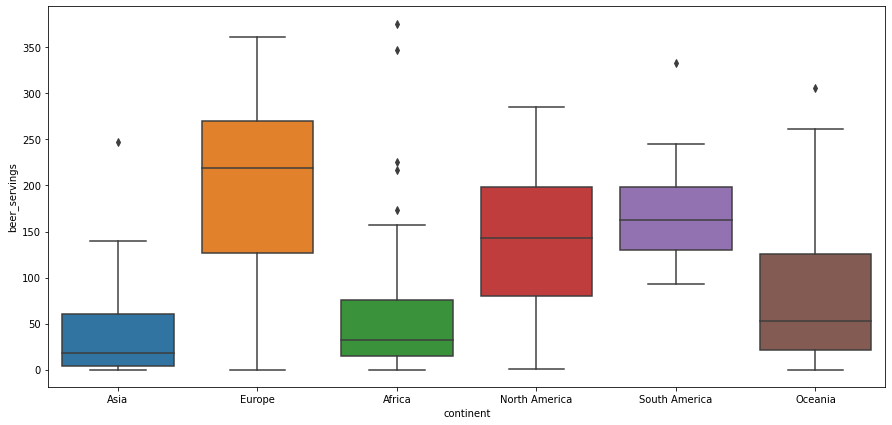

In [34]:
import seaborn as sns 
plt.figure(figsize=[15,7])
sns.boxplot(x="continent", y="beer_servings", data=df)

<b>Question 5</b>: Use the function <code> regplot</code> in the seaborn library to determine if the number of wine servings is
negatively or positively correlated with the number of beer servings.


In [35]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['wine_servings'], df['beer_servings'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5271716935065209  with a P-value of P = 3.378401743961718e-15


(0.0, 411.9570413986357)

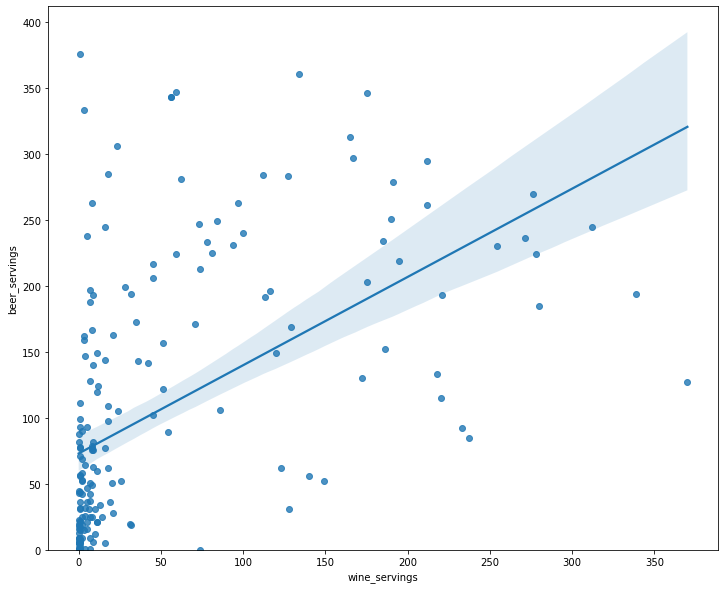

In [36]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="wine_servings", y="beer_servings", data=df)
plt.ylim(0,)

##### So, the number of beer_servings and wind_serving is positively correlated .Also in some cases only beer is served

<b> Question 6:</b> Fit a linear regression model to predict the <code>'total_litres_of_pure_alcohol'</code> using the number of <code>'wine_servings'</code> then calculate $R^{2}$:


In [63]:
from sklearn.model_selection import train_test_split

y_data = df['total_litres_of_pure_alcohol']
x_data=df.drop('total_litres_of_pure_alcohol',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=0)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

lm=LinearRegression()
lm.fit(x_train[['wine_servings']], y_train)
yhat_train = lm.predict(x_train[["wine_servings"]])
print("Train Predicted Value: ",yhat_train[0:5])
yhat_test = lm.predict(x_test[["wine_servings"]])
print("Test Predicted Value: ",yhat_test[0:5])
print("R^2 for Test Data",lm.score(x_test[['wine_servings']], y_test))
print("R^2 for Train Data",lm.score(x_train[['wine_servings']], y_train))
print("Intercept is ",lm.intercept_)
print("Slope is ",lm.coef_)


number of test samples : 20
number of training samples: 173
Train Predicted Value:  [3.25885396 3.25885396 3.22692722 3.29078071 3.54619468]
Test Predicted Value:  [3.22692722 3.25885396 6.83464952 3.25885396 3.22692722]
R^2 for Test Data 0.17698593687059994
R^2 for Train Data 0.45741941870252656
Intercept is  3.2269272171534653
Slope is  [0.03192675]


<br>
<b>Note:</b> Please use <code>test_size = 0.10</code> and <code>random_state = 0</code> in the following questions.


<b>Question 7: </b>Use list of features to predict the <code>'total_litres_of_pure_alcohol'</code>, split the data into training and testing and determine the $R^2$ on the test data by using the provided code:


In [64]:
from sklearn.model_selection import train_test_split

y_data = df['total_litres_of_pure_alcohol']
x_data=df.drop('total_litres_of_pure_alcohol',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=0)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

lm=LinearRegression()
lm.fit(x_train[["beer_servings", "wine_servings", "spirit_servings"]], y_train)
yhat_train = lm.predict(x_train[["beer_servings", "wine_servings", "spirit_servings"]])
print("Train Predicted Value: ",yhat_train[0:5])
yhat_test = lm.predict(x_test[["beer_servings", "wine_servings", "spirit_servings"]])
print("Test Predicted Value: ",yhat_test[0:5])
print("R^2 for Test Data",lm.score(x_test[["beer_servings", "wine_servings", "spirit_servings"]], y_test))
print("R^2 for Train Data",lm.score(x_train[["beer_servings", "wine_servings", "spirit_servings"]], y_train))
print("Intercept is ",lm.intercept_)
print("Slope is ",lm.coef_)

number of test samples : 20
number of training samples: 173
Train Predicted Value:  [1.07590563 1.17643926 0.72058984 1.25262228 1.4908585 ]
Test Predicted Value:  [0.72058984 4.95383012 8.45405404 0.82260947 0.72058984]
R^2 for Test Data 0.6990304512837944
R^2 for Train Data 0.8843621858666174
Intercept is  0.7205898393369674
Slope is  [0.01809258 0.01621009 0.0157659 ]


<b>Question 8 :</b> Create a pipeline object that scales the data, performs a polynomial transform and fits a linear regression model. Fit the object using the training data in the question above, then calculate the R^2 using the test data. Take a screenshot of your code and the $R^{2}$. There are some hints in the notebook:


<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe

pipe.fit(x_train[["beer_servings", "wine_servings", "spirit_servings"]], y_train)
yhat_train = pipe.predict(x_train[["beer_servings", "wine_servings", "spirit_servings"]])
print("Train Predicted Value: ",yhat_train[0:5])
yhat_test = pipe.predict(x_test[["beer_servings", "wine_servings", "spirit_servings"]])
print("Test Predicted Value: ",yhat_test[0:5])
print("R^2 for Test Data",pipe.score(x_test[["beer_servings", "wine_servings", "spirit_servings"]], y_test))
print("R^2 for Train Data",pipe.score(x_train[["beer_servings", "wine_servings", "spirit_servings"]], y_train))

Train Predicted Value:  [1.21017029 0.9400267  0.67483964 1.46189861 1.73360873]
Test Predicted Value:  [0.67483964 4.4123025  8.54359816 0.7845907  0.67483964]
R^2 for Test Data 0.7076376133886035
R^2 for Train Data 0.8981586745966471


<b>Question 9</b>: Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculating the $R^{2}$ using the test data. Take a screenshot of your code and the $R^{2}$.


In [110]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train[["beer_servings", "wine_servings", "spirit_servings"]], y_train)
yhat = RigeModel.predict(x_test[["beer_servings", "wine_servings", "spirit_servings"]])
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)
print("R^2 value for Test Data=",RigeModel.score(x_test[["beer_servings", "wine_servings", "spirit_servings"]], y_test))

predicted: [0.72058998 4.9538301  8.4540539  0.82260961]
test set : [0.  4.6 8.2 0.1]
R^2 value for Test Data= 0.699030454901918


<b>Question 10</b>: Perform a 2nd order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data and setting the regularization parameter to 0.1. Calculate the $R^{2}$ utilizing the test data provided. Take a screenshot of your code and the $R^{2}$.


In [109]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[["beer_servings", "wine_servings", "spirit_servings"]])
x_test_pr=pr.fit_transform(x_test[["beer_servings", "wine_servings", "spirit_servings"]])
RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train_pr, y_train)
yhat = RigeModel.predict(x_test_pr)
print("R^2 value for Test Data=",RigeModel.score(x_test_pr, y_test))


R^2 value for Test Data= 0.7076376228095795


<b>Sources</b>


<a href=[https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01>](https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01%3E) Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits?</a> by By Mona Chalabi. You can download the dataset \<a href=[https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01>here](https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01>here)</a>.


### Thank you for completing this lab!

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
